In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('insurance.csv')

In [5]:
# data exploration
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
dataset.shape

(1338, 7)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
dataset.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [11]:
len(dataset.select_dtypes(include = 'object').columns)

3

In [13]:
dataset.select_dtypes(include = ['int64','float']).columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [14]:
len(dataset.select_dtypes(include = ['int64','float']).columns)

4

In [15]:
#Stastical  Summary
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [18]:
#Group dataset for categorical values i.e Sex,Smoker,Region
dataset.groupby('sex').mean()

,age,bmi,children,expenses
sex,,,,
female,39.503021,30.379758,1.074018,12569.578897
male,38.917160,30.945266,1.115385,13956.751420


In [19]:
dataset.groupby('smoker').mean()

,age,bmi,children,expenses
smoker,,,,
no,39.385338,30.653195,1.090226,8434.268449
yes,38.514599,30.713139,1.113139,32050.231971


In [20]:
dataset.groupby('region').mean()

,age,bmi,children,expenses
region,,,,
northeast,39.268519,29.176235,1.046296,13406.384691
northwest,39.196923,29.201846,1.147692,12417.575169
southeast,38.939560,33.359341,1.049451,14735.411538
southwest,39.455385,30.596615,1.141538,12346.937908


In [21]:
#Dealing with missing values
dataset.isnull().values.any()

False

In [22]:
dataset.isnull().values.sum()

0

In [23]:
#Encoding categorical data
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [24]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [25]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [26]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
#One hot encoding
dataset = pd.get_dummies(data = dataset,drop_first=True)
dataset.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [30]:
dataset.shape

(1338, 9)

In [31]:
#Correlation matrix
dataset_2 = dataset.drop(columns='expenses')# To drop expenses column we get all independent columns

In [33]:
dataset_2.head

<bound method NDFrame.head of       age   bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.9         0         0           1                 0   
1      18  33.8         1         1           0                 0   
2      28  33.0         3         1           0                 0   
3      33  22.7         0         1           0                 1   
4      32  28.9         0         1           0                 1   
...   ...   ...       ...       ...         ...               ...   
1333   50  31.0         3         1           0                 1   
1334   18  31.9         0         0           0                 0   
1335   18  36.9         0         0           0                 0   
1336   21  25.8         0         0           0                 0   
1337   61  29.1         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2           

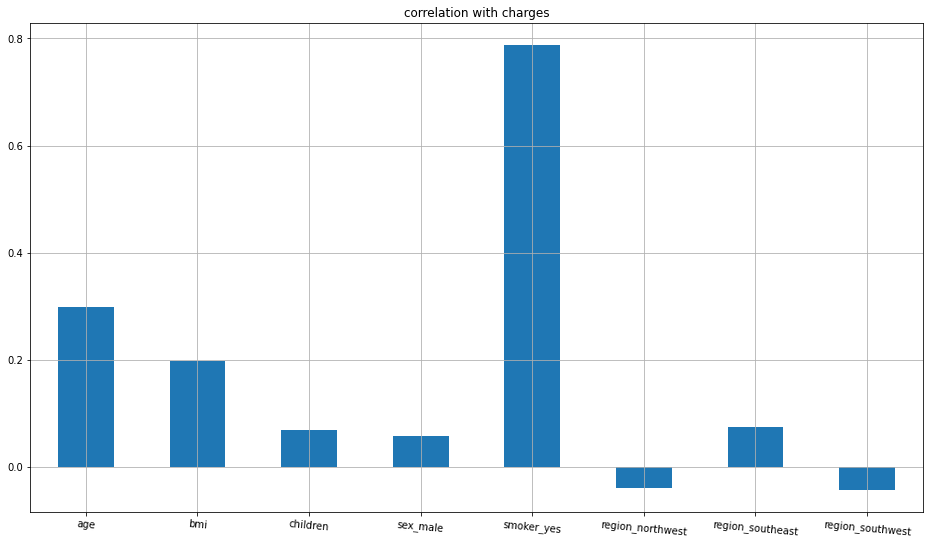

In [34]:
dataset_2.corrwith(dataset['expenses']).plot.bar(figsize=(16,9),title='correlation with charges',rot=45-50,grid=True)
corr=dataset.corr()

<AxesSubplot:>

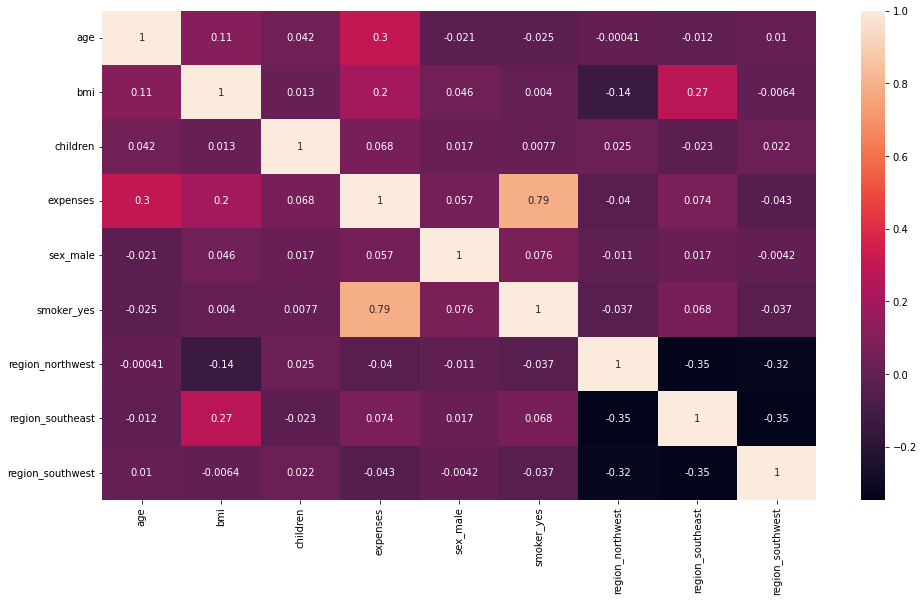

In [35]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [36]:
dataset.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [42]:
#matrix of features/independent variables
x=dataset.drop(columns='expenses')
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [43]:
#target/dependent variable
y=dataset['expenses']
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
x_train.shape

(1070, 8)

In [47]:
y_train.shape

(1070,)

In [48]:
x_test.shape

(268, 8)

In [49]:
y_test.shape

(268,)

In [51]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [52]:
x_train

array([[-0.14853305,  0.54493962,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59345325, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96539113,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91046946, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77133659, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97776946, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [53]:
x_test

array([[ 0.91668389, -0.08573765, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21510735, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.5960684 ,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54755476, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.35350022,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.9589831 ,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

In [54]:
#Building model

# Multiple linear regression
from sklearn.linear_model import LinearRegression
regressor_lr=LinearRegression()
regressor_lr.fit(x_train,y_train)


LinearRegression()

In [55]:
y_pred=regressor_lr.predict(x_test)

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8000184017333828

In [62]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor()
regressor_rf.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
y_pred=regressor_rf.predict(x_test)

In [64]:
r2_score(y_test,y_pred)

0.8763540642409563

In [67]:
pip install xgboost


     ---------------------------------------- 70.9/70.9 MB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
from xgboost import XGBRFRegressor
regressor_xgb=XGBRFRegressor()
regressor_xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [70]:
y_pred=regressor_xgb.predict(x_test)

In [71]:
r2_score(y_test,y_pred)

0.8940564261098978

In [76]:
# predict charges for new customer
#Name:Frank,age:40,sex:1,bmi:45-50,children:4,smoke:1,region:northeast
dataset.head()
frank_obs=[[40,45.5,5,4,1,1,0,0]]
regressor_xgb.predict(sc.transform(frank_obs))

C:\Users\swaru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([44131.22], dtype=float32)